<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [4]:
# a) 
import random 
#bias_distribution = (1, 2, 3, 4, 5, 6, 7, 8) 

def dice(distribution): 
    counter = [*range(1, distribution+1)]
    bias_sum = 36 #36 sum of all biases 
    num_in_distribution = [i/bias_sum for i in range(1, (distribution+1))]
    #throw = random.random(0,8)
    while True:
    #while throw < empty_counter:  
        yield random.choices(counter, weights= num_in_distribution, k = 1)
        #empty_counter += number
        #throw+=1 
for i in range(30): 
    print(next(dice(8)))
    

    
#look up how to use lists in generator functions 

[4]
[7]
[8]
[3]
[8]
[1]
[7]
[2]
[6]
[7]
[8]
[4]
[8]
[7]
[8]
[7]
[7]
[7]
[8]
[4]
[6]
[7]
[4]
[3]
[8]
[7]
[5]
[6]
[3]
[7]


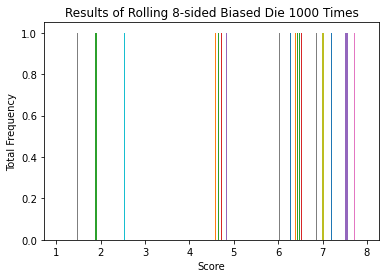

In [7]:
# b) 
import matplotlib.pyplot as plt

data = [next(dice(8)) for i in range(0,1000)]
plt.title("Results of Rolling 8-sided Biased Die 1000 Times")
plt.xlabel("Score")
plt.ylabel("Total Frequency")
plt.hist(data)
plt.show()

In [2]:
# c)
import random
import time
 

def new_dice(distribution, sides, output=True): 
    now = time.time()
        
    def dice(distribution):
        counter = [*range(1, distribution+1)]
        bias_sum = 36 
        num_in_distribution = [i/bias_sum for i in range(1, (distribution+1))]
        
        while True: 
            throw = random.choices(counter, weights= num_in_distribution, k = 1)
            yield throw[0]
    
    side_values = [*range(1, distribution+1)]
    stop = []
    for i in range(0, sides): 
        if all(item in stop for item in side_values):
            break
        else:    
            side= next(dice(8))
            stop.append(side) 
            if output: 
                print(side)
        
       
           
    return (time.time() - now)
             
         
        
new_dice(8, 30)



something
3
5
4
2
7
8
8
6
6
7
4
8
8
1


0.0

### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

In [3]:
!pip install random-username

In [1]:
 #properties: users, floors that do exist, floors that have been visited, floors that haven't been visited

import random 
from random_username.generate import generate_username as GU


    
class Elevator: 
    """ num_floors is the total number of floors in the building,
    num_users is the total number of users per trip"""
    count_floors = 0
    def __init__(self, num_floors, num_users): 
        self.num_floors = num_floors 
        self.num_users = num_users
         
       
    def call_Elevator(self, count_floors = 0): 
        """add users with names so we can save key/value pairs with floors_visited from the random int simulation of users picking floors. """
        floors_visited = []
        user_labels = GU(10) #Will have to change this variable here because I can't get it to take num_users input as an argument, but I hate hard-coding for this reason
        Users = []
        Users.append(user_labels)
        #user_info = dict(zip(Users, str(new_floor)))
        print(f"Here's the silly names the random username generator came up with for our test elevator users: ") 
        print(user_labels)
        print(Users)
        elevator_usage = dict(zip(Users, floors_visited))
        print(elevator_usage)
        """Here, users pick the floor they want to go to. 
        For now, I am having the users start on the ground floor to keep it simple, because more logic for return trips will take longer."""
      
        #Incorporating the random library to simulate a user choosing a floor 
        #Again, I really did not want to do it like this: wanted it to take num_users as the end argument in random. But I am running out of time here and it won't take it.
        new_floor = random.randint(0, 60) #Because I have set it to be limited to the number of floors in the simulation, the user cannot pick a floor that doesn't exist.
        count_floors += new_floor
        #Add new_floor to floors_visited
        floors_visited.append(new_floor)
        current_floor = new_floor
        print(f"New floor selected: proceeding to " + str(new_floor) + "!")
        
    
       
    
    #def floors_not_visited(self, num_floors): 
        unvisited_floors = ()
        for floor in num_floors:
            if floor not in floors_visited:
                unvisited_floors.append(floor)
        print(f"The following floors have not been visited in this simulation: ", unvisited_floors)
        stop_time = 10
        go_time = 5
        current_floor = new_floor #Having all users start at the ground floor because there isn't enough time to program return trips into this. 
        total_time = stop_time + go_time
        time_counter = 0
        i = (current_floor - count_floors)
        if current_floor > count_floors: 
            current_floor -= i 
            #and new floor needs to be added to floors_visited()
            floors_visited.append(current_floor) #In the first two, I am assuming the elevator would need to stop and go. 
            time_counter += total_time
            #If elevator is on a lower level than the user, then it needs to go up, and new floor needs to be added to floors_visited(). 
            print(f"Now arriving on floor " + str(current_floor) + "!")
        elif current_floor < count_floors: 
            current_floor += i
            floors_visited.append(current_floor)
            print(f"Now arriving on floor " + str(current_floor) + "!")
            #If elevator is at the same level as the user, then it just needs to open the doors. 
        elif current_floor == count_floors: 
            print(f"Attention! Elevator door is opening!") 
            floors_visited.append(current_floor)
            time_counter += total_time
        
        else: 
            print(f"No floors called: the Elevator is standing by on " + str(current_floor) + " ready for the next trip.")
            time_counter += stop_time #Ideally, I would like to take into account the hours or minutes that the elevator is without users, but this becomes a huge problem if I do.
        print(f"Floors visited: " + str(floors_visited) + ": Total time for each :  " + str(time_counter)) 
            
  
        
        



In [2]:
test_ride_1 = Elevator(60, 10)
test_ride_1.call_Elevator()






Here's the silly names the random username generator came up with for our test elevator users: 
['somberGnu6', 'solidLard2', 'dopeyHare3', 'wornoutCockatoo6', 'offendedPonie3', 'boredTruffle9', 'alertThrushe6', 'bubblyBurritos8', 'ferventSeafowl7', 'shyCod6']
[['somberGnu6', 'solidLard2', 'dopeyHare3', 'wornoutCockatoo6', 'offendedPonie3', 'boredTruffle9', 'alertThrushe6', 'bubblyBurritos8', 'ferventSeafowl7', 'shyCod6']]
{}
New floor selected: proceeding to 50!


NameError: name 'num_floors' is not defined

In [3]:
print("simulation results here")

simulation results here


New floor selected: proceeding to 21.
Attention! Elevator door is opening!
Here's the silly name the random username generator came up with for our test elevator user: 
['resolvedOryx4']


In [5]:
print("Will probably delete this since I don't need it anymore.")

Will probably delete this since I don't need it anymore.


There will be math here.
